## 3rd Assignment: Social contagion

In this assignment you will investigate the social contagion in a network by implementing the networked coordination game as described this week (see the slides of the lecture).

#### Part 1: Use synthetic graphs
- In the first part of exercise you can use the synthetic graphs available in the networkx library.
-In order to see social contagion you need to generate a graph, define the payoff matrix and select the random nodes that start the contagion. 
<br>Since it can take some time to tune the parameters I recommend you to start with small graphs. The video below shows the contagion in the Zachary Karate Club we have discussed in class and you can start with this graph too. 

#### Part 2: Use your real graph
Reuse the code developed in Part 1 and see what happens with your real graph. Have fun!


In questa terza esercitazione andremo a vedere come si espande il contagio all'interno delle nostre reti.
<br>Questa contaminazione può riferirsi a malattie(in questo periodo soprattutto) come il Coronavirus; ma nel nostro grafo vogliamo considerare come una nuova innovazione (l'utilizzo della posta elettronica, di autenticazione a due fattori etc) possa diffondersi all'interno del DIBRIS. Questi sono veri e propri esempi di social contagion (anziché biological contagion): le persone sono portate ad effettuare una scelta se adottare la nuova idea oppure no.

Nel nostro caso la contaminazione è di tipo complessa: un nodo decide di adottare una soluzione solo se un treshold dei suoi vicini l'ha adottata. 

La nostra matrice di payoff: #TODO: 

## Parte 1: synthetic graphs
In questa sezione andiamo ad analizzare un Erdös–Rényi random graph generato tramite networkx.

Utilizziamo questa sezione solo come test del nostro notebook, non andremo a fare eventuali valutazioni, e non testeremo su tutti i grafi creati nelle esercitazioni precedenti perché vogliamo andare ad analizzare meglio le situazioni sul grafo reale.

In [1]:
import networkx
graph = networkx.gnp_random_graph(50, 0.09, seed=42)

# Set contagion value to false
networkx.set_node_attributes(graph, False, 'contagion')

In [2]:
# Plot graph
import matplotlib.pyplot as plt

def plot_graph(G, step):
    colors = list()
    for key, value in networkx.get_node_attributes(G, 'contagion').items():
        if value: 
            colors.append('red')
        else:
            colors.append('blue')
    networkx.draw(G, pos=pos=nx.spring_layout(G) node_color=colors, node_size=50, arrowsize=3)
    plt.draw()
    plt.show()
    plt.close()

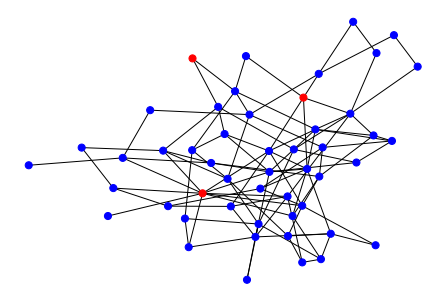

In [3]:
# Start contagiando nodi random
import random

random.seed(42)
def get_random_node(G):
    list_of_nodes = G.nodes()
    return random.sample(list_of_nodes, 1)[0]

for i in range(3):
    graph.nodes[get_random_node(graph)]['contagion'] = True

plot_graph(graph, 0)

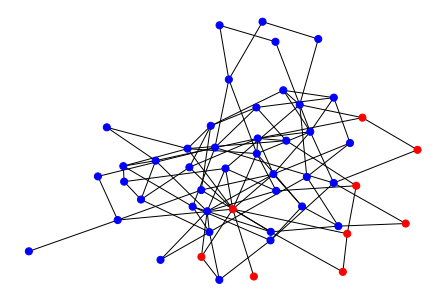

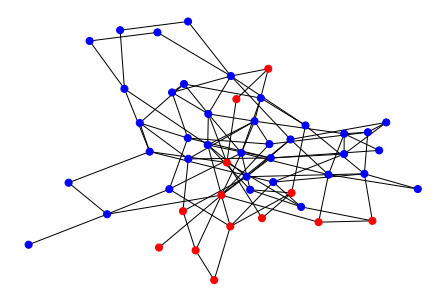

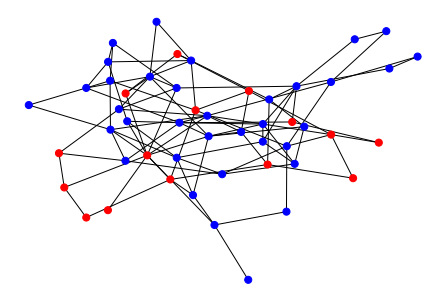

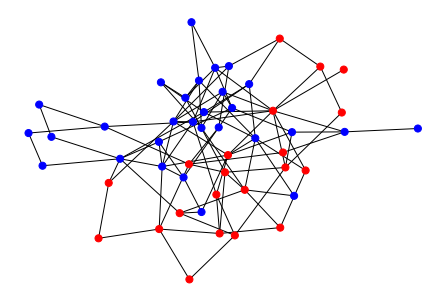

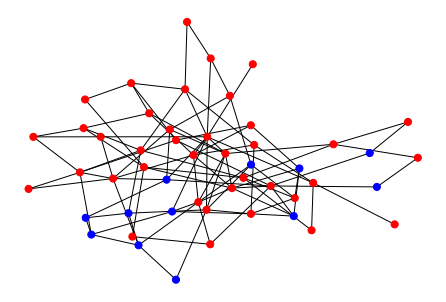

In [4]:
# Contagion
a = 1
b = 3
def contagion(G):
    for n in graph.nodes():
        # Quanti vicini
        n_vicini = len(list(set(G.edges(n))))
        if n_vicini == 0:
            continue
        
        puri = 0
        for nodo, arrivo in list(set(G.edges(n))):
            if not graph.nodes[arrivo]['contagion']:
                puri += 1
        p = puri / n_vicini
        contagia = (1-p) * n_vicini * b
        non_contagia = p * n_vicini * a
        
        if contagia > non_contagia:
            G.nodes[n]['contagion'] = True

for i in range(5):
    contagion(graph)
    plot_graph(graph, i)
    